# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)

In [2]:
gg_data = pd.read_csv('data/googleplaystore.csv')
# new_data = pd.read_csv('data/new_app_data.csv')

In [3]:
data = gg_data.copy()

In [4]:
for col in data:
    print(col)
    print(data[col].value_counts(normalize=True))
    print('-------------------------------')

App
ROBLOX                                               0.000830
CBS Sports App - Scores, News, Stats & Watch Live    0.000738
8 Ball Pool                                          0.000646
Duolingo: Learn Languages Free                       0.000646
ESPN                                                 0.000646
                                                       ...   
Filters for Selfie                                   0.000092
CJ Wilson's ZoomZoomnation                           0.000092
Weather From DMI/YR                                  0.000092
Hotstar                                              0.000092
Photo Effects Pro                                    0.000092
Name: App, Length: 9660, dtype: float64
-------------------------------
Category
FAMILY                 0.181902
GAME                   0.105525
TOOLS                  0.077760
MEDICAL                0.042708
BUSINESS               0.042432
PRODUCTIVITY           0.039111
PERSONALIZATION        0.036159
COMMUNICA

**Observations**
1. **App - there seems to be a few duplicates in app. have to deal with deleting those.**
2. **Category - need to look into '1.9'.**
3. **Rating - the rating is from 1-5, but there's a rating of 19. Need to delete that one.**
4. **Reviews - might drop the '0' reviews or filter the amount of reviews.**
5. **Size - the 'varies with device' need to be replace with the average size and the "M" needs to be taken out.**
6. **Installs - need to get rid of the '+' and maybe filter a min-max scale.**
7. **Change Type into a numeric column**
8. **Change last update into days.**

# Cleaning

## App Duplicates

In [5]:
data.App.value_counts(normalize=True)

ROBLOX                                               0.000830
CBS Sports App - Scores, News, Stats & Watch Live    0.000738
8 Ball Pool                                          0.000646
Duolingo: Learn Languages Free                       0.000646
ESPN                                                 0.000646
                                                       ...   
Filters for Selfie                                   0.000092
CJ Wilson's ZoomZoomnation                           0.000092
Weather From DMI/YR                                  0.000092
Hotstar                                              0.000092
Photo Effects Pro                                    0.000092
Name: App, Length: 9660, dtype: float64

In [6]:
# let's check to make sure we have duplicates
data[data['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [7]:
data[data['App'] == 'ESPN']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up


In [8]:
data[data['App'] == 'Candy Crush Saga']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1705,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1751,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1842,Candy Crush Saga,GAME,4.4,22429716,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1869,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1966,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
3994,Candy Crush Saga,FAMILY,4.4,22419455,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up


**Looking at some of the duplicates it seems that the only difference is the amount of reviews and/or the category name. For now I think I'll stick with the first value and drop the rest.**

In [9]:
data = data.drop_duplicates(subset=['App'], keep='first')

## Category

In [10]:
data[data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Since this is one entry I can easily find the correct info and plug it in.
Category = Lifestyle
Rating = 1.9
Reviews = 19.0
Size = 3.0M
Installs = 1,000
Type = Free
Price = 0
Content Rating = Everyone

In [11]:
data.at[10472,"Category"]="LIFESTYLE"
data.at[10472, "Rating"] = 1.9
data.at[10472, "Reviews"] = "19.0"
data.at[10472, "Size"] = "3.0M"
data.at[10472, "Installs"] = "1,000+"
data.at[10472, "Type"] = "Free"
data.at[10472,'Price']= 0
data.at[10472, "Content Rating"] = "Everyone"
data.at[10472, "Last Updated"] = "February 11, 2018"

In [12]:
data[data['App'] == 'Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,"February 11, 2018","February 11, 2018",4.0 and up,NaN


## Last Updated

In [13]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'], format="%B %d, %Y", errors='coerce')

In [14]:
# data['Date'] = pd.to_datetime(data['Last Updated'])
release_month = data['Last Updated'].dt.month
data['Month'] = release_month

In [15]:
data = data.drop(['Last Updated'], axis =1)

## Rating

In [16]:
# replacing the NAN values with the average rating
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())

In [17]:
data['Rating'] = data['Rating'].round()

<AxesSubplot:xlabel='Rating', ylabel='count'>

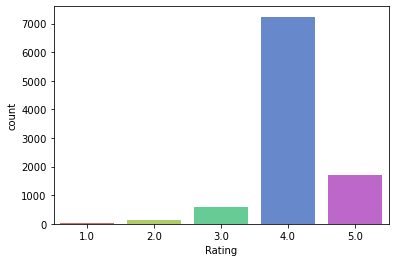

In [18]:
sns.countplot(x='Rating', data=data, palette='hls')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9660 non-null   object 
 9   Genres          9660 non-null   object 
 10  Current Ver     9652 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  Month           9660 non-null   int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 1.3+ MB


## Add new data

In [20]:
new_data = pd.read_csv('data/new_app_data.csv')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             827 non-null    object 
 1   Installs        826 non-null    object 
 2   Rating          826 non-null    float64
 3   Reviews         826 non-null    float64
 4   Price           826 non-null    float64
 5   Size            827 non-null    object 
 6   Genres          827 non-null    object 
 7   Category        827 non-null    object 
 8   Content Rating  827 non-null    object 
 9   Last Updated    819 non-null    object 
 10  Current Ver     827 non-null    object 
 11  Android Ver     825 non-null    object 
 12  Type            827 non-null    object 
 13  Date            819 non-null    object 
 14  Month           819 non-null    float64
dtypes: float64(4), object(11)
memory usage: 97.0+ KB


In [21]:
new_data = new_data.drop(['Last Updated', 'Date'], axis=1)

In [22]:
app_data = new_data.copy()
app_data

,App,Installs,Rating,Reviews,Price,Size,Genres,Category,Content Rating,Current Ver,Android Ver,Type,Month
0,Jelly Dye,"1,000,000+",4.2,3010.0,0.0,Varies with device,Simulation,GAME_SIMULATION,Everyone,1.49,5.0 and up,Free,2.0
1,Solar Smash,"10,000,000+",4.6,99185.0,0.0,83M,Simulation,GAME_SIMULATION,Everyone 10+,1.4.1,4.4W and up,Free,1.0
2,Comics Bob,"5,000,000+",3.8,10227.0,0.0,81M,Puzzle,GAME_PUZZLE,Teen,1.1.0,5.0 and up,Free,10.0
3,Draw Puzzle - Draw one part,"5,000,000+",4.3,8889.0,0.0,47M,Puzzle,GAME_PUZZLE,Everyone,1.0.29,4.4 and up,Free,12.0
4,Among Us,"100,000,000+",3.8,5620232.0,0.0,102M,Action,GAME_ACTION,Everyone 10+,2021.3.9,4.4 and up,Free,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,"Mathway: Scan Photos, Solve Problems","10,000,000+",4.6,105363.0,0.0,31M,Education,EDUCATION,Everyone,3.3.32,4.4 and up,Free,2.0
823,"Avast Antivirus – Scan & Remove Virus, Cleaner","100,000,000+",4.7,165252.0,0.0,34M,Tools,TOOLS,Everyone,6.37.0,5.0 and up,Free,12.0
824,Wattpad - Read & Write Stories,"100,000,000+",3.9,1406630.0,0.0,Varies with device,Books & Reference,BOOKS_AND_REFERENCE,Teen,Varies with device,Varies with device,Free,3.0
825,"MotorTrend: Stream Roadkill, Top Gear, and more","1,000,000+",4.4,7285.0,0.0,25M,Entertainment,ENTERTAINMENT,Everyone,4.8.2,5.0 and up,Free,5.0


In [23]:
app_data.App.value_counts(normalize=True)

8 Ball Pool                                          0.002418
Garena Free Fire - The Cobra                         0.002418
Call of Duty®: Mobile - Day of Reckoning             0.002418
DRAGON BALL LEGENDS                                  0.002418
Brawl Stars                                          0.002418
                                                       ...   
IMVU: real friendships, virtual life & chat rooms    0.001209
LineX Icon Pack                                      0.001209
WWE SuperCard - Multiplayer Collector Card Game      0.001209
The Room                                             0.001209
SD Maid Pro - Unlocker                               0.001209
Name: App, Length: 818, dtype: float64

In [24]:
app_data['Rating'] = app_data['Rating'].round()

In [25]:
app_data = app_data.dropna()

In [26]:
df = pd.concat([data, app_data])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10477 entries, 0 to 826
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10477 non-null  object 
 1   Category        10477 non-null  object 
 2   Rating          10477 non-null  float64
 3   Reviews         10477 non-null  object 
 4   Size            10477 non-null  object 
 5   Installs        10477 non-null  object 
 6   Type            10476 non-null  object 
 7   Price           10477 non-null  object 
 8   Content Rating  10477 non-null  object 
 9   Genres          10477 non-null  object 
 10  Current Ver     10469 non-null  object 
 11  Android Ver     10474 non-null  object 
 12  Month           10477 non-null  float64
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [27]:
df['App'].duplicated().any()

True

In [28]:
df['App'].value_counts(normalize=True)

8 Ball Pool                       0.000286
DRAGON BALL LEGENDS               0.000286
DRAGON BALL Z DOKKAN BATTLE       0.000286
Five Nights at Freddy's 4         0.000191
Elevate - Brain Training Games    0.000191
                                    ...   
Fever Meter                       0.000095
BlackCam Pro - B&W Camera         0.000095
Stickman and Axe                  0.000095
Motorola FM Radio                 0.000095
Photo Effects Pro                 0.000095
Name: App, Length: 10352, dtype: float64

In [29]:
df = df.drop_duplicates(subset=['App'], keep='first')

In [30]:
df= df.drop(columns={'Current Ver', 'Android Ver'}, axis=1)

In [31]:
df[df.App == 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Month


In [32]:
df.head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.0,159,19M,"10,000+",Free,0,Everyone,Art & Design,1.0
1,Coloring book moana,ART_AND_DESIGN,4.0,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,1.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5.0,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,8.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.0,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,6.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.0,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,6.0
5,Paper flowers instructions,ART_AND_DESIGN,4.0,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,3.0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,4.0,178,19M,"50,000+",Free,0,Everyone,Art & Design,4.0
7,Infinite Painter,ART_AND_DESIGN,4.0,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,6.0
8,Garden Coloring Book,ART_AND_DESIGN,4.0,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,9.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,5.0,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,7.0


## Reviews

In [33]:
df.shape

(10352, 11)

In [34]:
df = df.dropna().reset_index(drop =True)

In [35]:
df.shape

(10351, 11)

In [36]:
df.Reviews.value_counts(normalize=True)

0        0.057193
1        0.026278
2        0.020578
3        0.016424
4        0.013235
           ...   
14210    0.000097
14835    0.000097
20008    0.000097
4074     0.000097
42492    0.000097
Name: Reviews, Length: 6008, dtype: float64

In [37]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

## Installs

In [38]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Month             0
dtype: int64

In [39]:
df['Installs'].value_counts()

1,000,000+        1525
100,000+          1242
10,000+           1111
10,000,000+       1067
1,000+             906
100+               711
5,000,000+         652
500,000+           544
50,000+            515
5,000+             481
10+                387
500+               329
50,000,000+        240
100,000,000+       226
50+                204
5+                  82
1+                  68
500,000,000+        25
1,000,000,000+      22
0+                  14
Name: Installs, dtype: int64

In [40]:
# remove the + sign from columns
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','')

In [41]:
df['Installs'].value_counts()

1000000       1525
100000        1242
10000         1111
10000000      1067
1000           906
100            711
5000000        652
500000         544
50000          515
5000           481
10             387
500            329
50000000       240
100000000      226
50             204
5               82
1               68
500000000       25
1000000000      22
0               14
Name: Installs, dtype: int64

In [42]:
df['Installs'] = pd.to_numeric(df['Installs'])

## Size

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10351 entries, 0 to 10350
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10351 non-null  object 
 1   Category        10351 non-null  object 
 2   Rating          10351 non-null  float64
 3   Reviews         10351 non-null  float64
 4   Size            10351 non-null  object 
 5   Installs        10351 non-null  int64  
 6   Type            10351 non-null  object 
 7   Price           10351 non-null  object 
 8   Content Rating  10351 non-null  object 
 9   Genres          10351 non-null  object 
 10  Month           10351 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 889.7+ KB


In [53]:
df['Size'].value_counts(normalize=True)

0.0                   0.837117
Varies with device    0.131678
0.001                 0.000386
0.057                 0.000290
0.196                 0.000290
                        ...   
0.31                  0.000097
0.362                 0.000097
0.506                 0.000097
0.667                 0.000097
0.484                 0.000097
Name: Size, Length: 281, dtype: float64

In [48]:
df['Size'] = df['Size'].astype('str')

In [52]:
for idx,row in df.iterrows():
    if 'k' in row['Size']:
        df.loc[idx, 'Size'] = round(float(row['Size'].replace('k',''))/2**10,3)
    elif 'M' in row['Size']:
        df.loc[idx, 'Size'] = round(float(row['Size'].replace('M',''))/2**20,3)
    elif 'G' in row['Size']:
        df.loc[idx, 'Size'] = round(float(row['Size'])/2**30,3)

In [ ]:
for idx,row in df.iterrows():
    if 'M' in row['Size']:
        df.loc[idx, 'Size'] = str(round(float(row['Size'].replace('M',''))/1024**2,3))

In [ ]:
df['Size'].value_counts()

In [ ]:
# converting kilobytes to bytes
df["Size"] = [str(round(float(i.replace("k", ""))/1024, 3)) if "k" in i else i for i in df.Size]

In [ ]:
# df["Size"] = [str(round(float(i.replace("M", ""))/1024**2, 3)) if "M" in i else i for i in df.Size]

In [ ]:
# df["Size"] = [str(round(float(i.replace("G", ""))/1024**3, 3)) if "G" in i else i for i in df.Size]

In [ ]:
df[df['Size'] == "Varies with device"]

In [ ]:

# mask = df['Size'].str.startswith('V')

In [ ]:
#replace that value with zero
df.loc[mask, 'Size'] = 0

In [ ]:
# df['Size'] = df['Size'].apply(lambda x: x.strip('M'))
# df['Size'] = df['Size'].apply(lambda x: x.strip('G'))

In [ ]:
# df = df.replace(['Size', [0, mean_size]])

In [ ]:
# df[df['Size'] == 'Varies with device'] = 0.0
df['Size'] = df['Size'].astype(float)

In [ ]:
mean_size = df['Size'].mean()

In [ ]:
df.loc[df.Size == 0.0, 'Size'] = mean_size

In [ ]:
df.head(50)

In [ ]:
#to retain some data replace zeros with the column's avearge
df['Size'] = df.Size.mask(df.Size == 0.0,mean_size)

In [ ]:
df['Size'] = df['Size'].round()

In [ ]:
df['Size']

## Free Apps

In [ ]:
df.info()

In [ ]:
df.Type.value_counts(normalize=True)

In [ ]:
df['is_free'] = df['Type'].map(lambda x: 1 if x == 'Free' else 0)

In [ ]:
df['Price'] = df['Price'].apply(lambda x : str(x).strip('$')).astype(float)
df['Price'] = df['Price'].round()

In [ ]:
# from sklearn import preprocessing
# def labelencode(col, df):
#     le = preprocessing.LabelEncoder()
#     df[col] = le.fit_transform(df[col])

In [ ]:
# le = preprocessing.LabelEncoder()
# df['Content Rating'] = le.fit_transform(df['Content Rating'])

# le = preprocessing.LabelEncoder()
# df['Genres'] = le.fit_transform(df['Genres'])

In [ ]:
main_df = df.copy()

In [ ]:
main_df.head()

In [ ]:
main_df = main_df.drop('Type', axis=1)

# Cleaned Data

In [ ]:
main_df.info()

In [ ]:
main_df.to_csv('clean_data.csv')

In [ ]:
main_df.App.value_counts(normalize=True)

In [ ]:
main_df[main_df.App == 0]